---
# 07. 다층 퍼셉트론으로 손글씨 분류하기

In [180]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1979개의 이미지 데이터 로드

In [181]:
# 첫 번째 샘플 출력
print(digits.images[0]) # 8*8 행렬이 출력
print(digits.target[0]) # 라벨은 0

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


In [182]:
# 전체 샘플의 개수를 확인해보자
print('전체 샘플의 수: {}'.format(len(digits.images)))

전체 샘플의 수: 1797


1 번 인덱스 샘플의 레이블 :  0
2 번 인덱스 샘플의 레이블 :  1
3 번 인덱스 샘플의 레이블 :  2
4 번 인덱스 샘플의 레이블 :  3
5 번 인덱스 샘플의 레이블 :  4


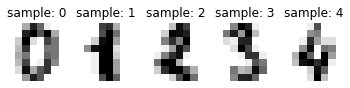

In [183]:
# 상위 5개만 시각화해보자
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    print(index+1,'번 인덱스 샘플의 레이블 : ',label)
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [184]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [185]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [186]:
# 다층 퍼셉트론 분류기 만들기
import torch
import torch.nn as nn
from torch import optim

In [187]:
torch.manual_seed(1)

In [188]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [189]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [190]:
loss_fn = nn.CrossEntropyLoss()

In [191]:
optimizer = optim.Adam(model.parameters())

In [192]:
losses = []

In [193]:
for epoch in range(3):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.441051


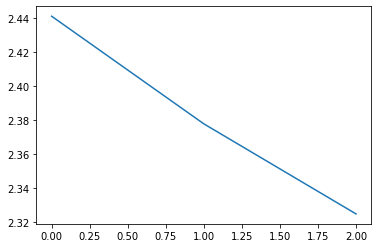

In [194]:
plt.plot(losses)

---
## Classification report

In [195]:
# 라이브러리 불러오기
from sklearn.metrics import classification_report

# 예측값 추출
y_pred = model(X)
y_pred = torch.argmax(y_pred, 1).detach().numpy()

# classification report 
print(classification_report(Y, y_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.18      0.59      0.28       182
           2       0.00      0.00      0.00       177
           3       0.10      0.37      0.15       183
           4       0.02      0.01      0.01       181
           5       0.17      0.38      0.23       182
           6       0.00      0.00      0.00       181
           7       0.33      0.04      0.07       179
           8       0.00      0.00      0.00       174
           9       0.00      0.00      0.00       180

    accuracy                           0.14      1797
   macro avg       0.08      0.14      0.07      1797
weighted avg       0.08      0.14      0.08      1797



C:\Users\lemon\anaconda3\envs\chch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemon\anaconda3\envs\chch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemon\anaconda3\envs\chch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
print(classification_report(Y, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.18      0.59      0.28       182
           2       1.00      0.00      0.00       177
           3       0.10      0.37      0.15       183
           4       0.02      0.01      0.01       181
           5       0.17      0.38      0.23       182
           6       0.00      0.00      0.00       181
           7       0.33      0.04      0.07       179
           8       1.00      0.00      0.00       174
           9       0.00      0.00      0.00       180

    accuracy                           0.14      1797
   macro avg       0.28      0.14      0.07      1797
weighted avg       0.28      0.14      0.08      1797



In [197]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y, y_pred))

0.13967723984418476


In [204]:
for i in range(10):
    print(i, '라벨의 개수:', end= ' ')
    print(Y.tolist().count(i))

0 라벨의 개수: 178
1 라벨의 개수: 182
2 라벨의 개수: 177
3 라벨의 개수: 183
4 라벨의 개수: 181
5 라벨의 개수: 182
6 라벨의 개수: 181
7 라벨의 개수: 179
8 라벨의 개수: 174
9 라벨의 개수: 180
